# K-Nearest Neighbors (p. 63 ~)

In [1]:
import pandas as pd
import numpy as np
import IPython
import scipy as sp
import mglearn

C:\Users\mb910\Anaconda3\envs\introml\lib\site-packages\sklearn\externals\six.py:28: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  warnings.warn("The module is deprecated in version 0.21 and will be removed "
C:\Users\mb910\Anaconda3\envs\introml\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = "c:/Windows/Fonts/malgun.ttf"
font_name = fm.FontProperties(fname=font_path, size=10).get_name()
plt.rc('font', family=font_name, size=12)
plt.rcParams["figure.figsize"] = (20, 10)

C:\Users\mb910\Anaconda3\envs\introml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\Users\mb910\Anaconda3\envs\introml\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mb910\Anaconda3\envs\introml\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


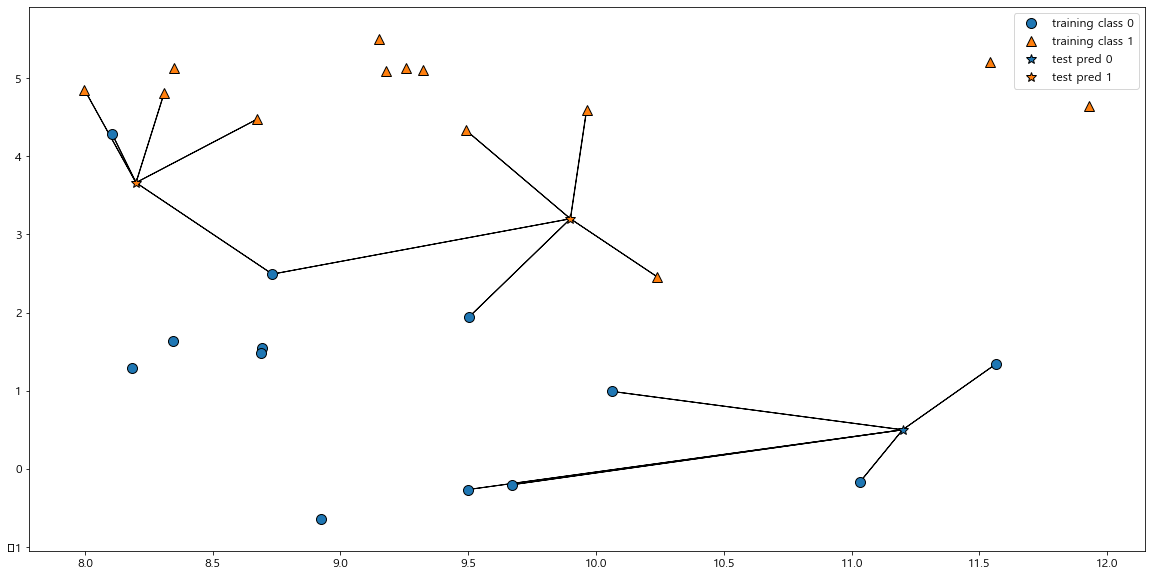

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors=5)

## 머신러닝 프로세스 맛보기

### 1) train / test data split

In [4]:
from sklearn.model_selection import train_test_split

X,y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

C:\Users\mb910\Anaconda3\envs\introml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


### 2) fitting the data into estimator

In [5]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 3)

In [6]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

### 3) Calculating the Acc

In [7]:
print('테스트 세트 예측: ', clf.predict(X_test))

테스트 세트 예측:  [1 0 1 0 1 0 0]


In [8]:
print(f'Acc: {clf.score(X_test, y_test) :.2f}')

Acc: 0.86


## 1. KNeighborsClassifier 분석

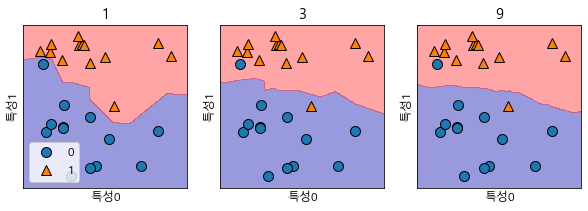

In [9]:
fig, axes = plt.subplots(1,3,figsize = (10,3))

for n_neighbors, ax in zip([1,3,9], axes):
    
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X,y)
    # eps: 퍼진 정도 , alpha = color 농도
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title(f'{n_neighbors}')
    ax.set_xlabel('특성0')
    ax.set_ylabel('특성1')
    
axes[0].legend(loc=3)

## 모델 복잡도와 일반화 관계 (breast_cancer data 이용)

- 모델을 너무 복잡하게 만들면( knn의 경우 n_neighbors 가 작을수록 ), 일반화하기 어려운 모델이 만들어짐.
- 모델을 너무 단순하게 만들면, 정확도가 떨어짐

In [10]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,\
                                                    random_state = 66, stratify = cancer.target)

training_acc = []
test_acc = []

# 1에서 10까지 n_neighbors 를 적용
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    training_acc.append( clf.score(X_train, y_train) )
    test_acc.append( clf.score(X_test, y_test) )

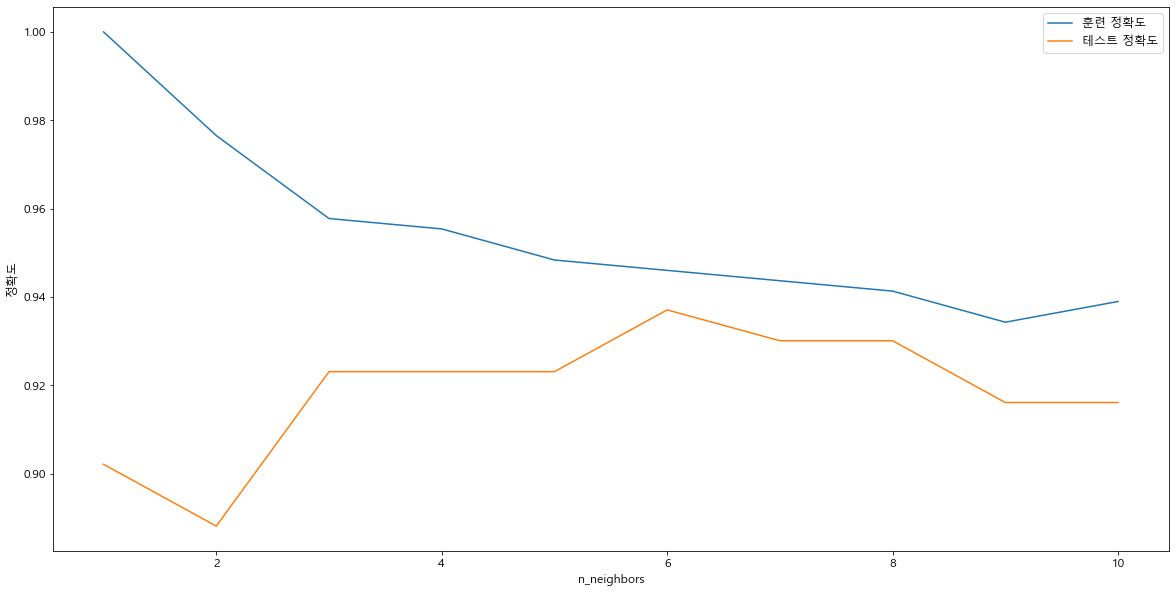

In [11]:
plt.plot(neighbors_settings, training_acc, label = '훈련 정확도')
plt.plot(neighbors_settings, test_acc, label = '테스트 정확도')
plt.xlabel('n_neighbors')
plt.ylabel('정확도')
plt.legend()

# Summary

- KNN의 중요 매개변수: '데이터 포인트 사이의 거리를 재는 방법', '이웃의 수'
- 훈련 세트가 매우 크면 예측이 느림.
- 데이터 전처리 과정이 매우 중요
- 다량의 특성을 가진 데이터셋에서는 잘 동작하지 않음.